In [104]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy
Тут розписані основні властивості даної бібліотеки

Навіщо:
* швидкі векторні операції для різного роду обчислень
* стандартні алгоритми роботи з масивами 
* агрегація і узагальнення даних 
* групування операцій з даними 

### ndarray об'єкт N-мірного масива 
* індексація з 0
* підмножині(зрізу) можна присвоїти однакові значення
* зріз це посилання на частину оригінальної матриці
* вісь oY іде першою при нумерації

**ВАЖЛИВО**

ndarray застосовується лише для однорідних даних
і для того щоб прцбвати з різними типами необхідно зробити приведення за допомогою
``np.astype`` яка по факту створює нову матрицю

In [23]:
#Створення матриці
data = [[1, 2, 4], [1, 2, 4]]
array = np.array(data)

print(array+array)

print("кількість рядків матриці: ")
print(array.ndim)

print("розмірність матриці: ")
print(array.shape)

print("тип даних матриці: ")
print(array.dtype)

[[2 4 8]
 [2 4 8]]
кількість рядків матриці: 
2
розмірність матриці: 
(2, 3)
тип даних матриці: 
int32


In [24]:
np.arange(15)#аналогія з функцією range()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [40]:
print("матриця з одининцями:")
print(np.ones((2,4)))
print("матриця з нулями:")
print(np.zeros((2,4)))
print("одинична матриця:")
print(np.identity(3))

матриця з одининцями:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
матриця з нулями:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
одинична матриця:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### **Зрізи**
Крім звичайних зрізів і операцій з ними,тут можна застосовувати різного роду булеві умови при створенні зріза
Також можна логічно поєднувати 2 матриці по якійсь осі і накладаючи умову на одну змінювати іншу

**!!!**
and i or тут не працюють

In [45]:
arr3d = np.array([[[-1,2],[1,2]],[[-1,2],[-1,2]]])
print(arr3d[:1])

array([[[1, 2],
        [1, 2]]])

In [46]:
arr3d[1]=12
arr3d

array([[[ 1,  2],
        [ 1,  2]],

       [[12, 12],
        [12, 12]]])

In [48]:
arr3d[0,0,0]

1

In [52]:
arr3d[arr3d > 0] = 0
arr3d

array([[[0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0]]])

**Прихотливе індексування(fancy indexing)**

Це індексування за допомогою цілочисельного масива, кожне значення якого є номером рядка, і відображаються вони в зазначеному порядку, зручно для перестановок рядків в матрицці.
    
    Якщо вказати від'ємні індекси то рядки просто рахуються з кінця

In [56]:
arr = np.empty((8,4))
for i in range(8):
    arr[i]= i
arr[[4,3,-1]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [7., 7., 7., 7.]])

In [63]:
arr = np.arange(32).reshape((8,4))
arr[[1,2],[0,0]]#тут формуються пари по кординатах(1,0) і (2,0)

array([4, 8])

**Транспонування**
* arr.T -звичайне 
* arr.transpose([коотеж номерів осей, який описує перестановку])

In [62]:
arr.T

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

### Універсальні функції 
це функції які виконують поелементні операції над даними  


In [73]:
arr = np.arange(3)
print(arr)
#унарні
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2]
[0.         1.         1.41421356]
[1.         2.71828183 7.3890561 ]


In [91]:
x = np.random.randn(4)
print(x)
y = np.random.randn(4)
print(y)
#бінарні
print(np.maximum(x,y))
print(np.add(x,y))
#...

[-1.78454655  1.47390533  2.22079849 -0.04962555]
[ 0.61933424  0.05320573  0.31767471 -0.07667277]
[ 0.61933424  1.47390533  2.22079849 -0.04962555]
[-1.16521232  1.52711105  2.5384732  -0.12629832]


### Векторизація
спосіб обробки даних через команди NumPy, без застосування циклів чистого python
тому більшість операцій математичних статичних і логічних записуються за допомогою стандартних функцій np


Text(0.5,1,'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

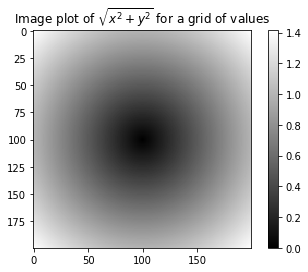

In [112]:
points = np.arange(-1,1, 0.01)

xs,ys = np.meshgrid(points,points)#з двох одномірних масивів робить 
z = np.sqrt(xs **2 + ys ** 2)
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

In [116]:
#Задача:беремо значення з x
#       якщо відповідне значення flags True 
#       іначе беремо з y 
x = np.array([1,2,3,4])
y = np.array([4,3,2,1])
flags = np.array([True,False,True,False])
result = np.where(flags,x,y)
print(result)

array([1, 3, 3, 1])

In [118]:
#Задача: значення більші 2 замінити на 2 
np.where(x > 2, 2, x)#в кінці х, бо то дія коли else

array([1, 2, 2, 2])

### Математичні і статичні операції


In [124]:
arr = np.random.randn(2,2)
print(arr)
print(arr.mean(axis = 0))#середнє арифметичне по осі 0
print(arr.sum(axis = 0))#сума елементів відносно осі 0
print(arr.std())# стандартне відхилення
print(arr.var())# дисперсія

[[ 0.006677    2.01729022]
 [-1.76835036 -1.38525811]]
[-0.88083668  0.31601606]
[-1.76167336  0.63203212]
1.482943451067776
2.199121279064805


### Сортування

In [127]:
arr = np.random.randn(8)
np.sort(arr)


array([-1.20119867, -0.78890291, -0.47739727, -0.41721211,  0.08415602,
        0.56374927,  0.95548764,  1.3790764 ])

### Операції з множинами 
* ``np.unique(names)`` - повертає унікальні значення одномірної матриці
* ``np.in1d(arr1, arr2)`` - перевіряє чи присутні елементи однієї множини в іншій і повертає булеву матрицю з результатами
і ще декілька 


### Робота з файлами
Можна працювати з тхт і таблицями 
А можна ось так:

In [132]:
arr = np.arange(10)
np.save('array',arr)

In [133]:
np.load('array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Лінійна Алгебра
* визначник
* множення
* сумадіагональних елементів
* Власні значення
* обернена матриця
* QR - розклад
* SVD - розклад
* вирішує Ax = b
* вирішує рівняння y = Xb(МНК)
* повертає діагональ як вектор
* псевдообернена матриця Мура-Пенроуз для квадратної матриці


In [138]:
x = np.random.randn(3,3)
y = np.random.randn(3,3)
np.dot(x,y)#перемножує дві матриці

array([[ 0.08918235, -0.0750577 ,  0.21911301],
       [-5.11020844, -0.50696626, -2.00262123],
       [-1.50568822, -0.19805172, -0.49003757]])